# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 10/19/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 10/19/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,801,38928341,2.1
Albania,2782,2877800,96.7
Algeria,2217,43851043,5.1
Andorra,1253,77265,1621.7
Angola,2104,32866268,6.4
Antigua and Barbuda,12,97928,12.3
Argentina,178194,45195777,394.3
Armenia,12377,2963234,417.7
Australia,224,25459700,0.9


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Holy See,15,809,1854.1
Andorra,1253,77265,1621.7
Czechia,91940,10708982,858.5
Belgium,96189,11589616,830.0
Netherlands,91804,17134873,535.8
Montenegro,3176,628062,505.7
France,276864,65273512,424.2
Armenia,12377,2963234,417.7
Argentina,178194,45195777,394.3


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

10/15/20    352107.0
10/16/20    359802.0
10/17/20    364664.0
10/18/20    368671.0
10/19/20    377068.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

10/6/20        NaN
10/7/20     4010.0
10/8/20     4804.0
10/9/20     4554.0
10/10/20    2968.0
10/11/20    2846.0
10/12/20    6541.0
10/13/20    4464.0
10/14/20    7173.0
10/15/20    7620.0
10/16/20    7695.0
10/17/20    4862.0
10/18/20    4007.0
10/19/20    8397.0
Name: Germany, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


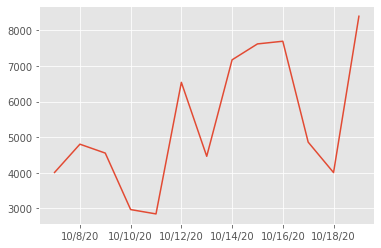

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

83.4778071144776